In [1]:
import pandas as pd

In [2]:
carstocks = pd.read_csv("DataAnalysis/data/car_stocks.csv")

In [3]:
titanic = pd.read_csv("DataAnalysis/data/titanic.csv")
titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")
titanic["fare"] = pd.to_numeric(titanic["fare"], errors="coerce")

In [6]:
s1 = titanic.groupby('sex')['age'].mean()

In [7]:
s1.index

Index(['female', 'male'], dtype='object', name='sex')

In [9]:
titanic.groupby(['pclass','sex'])['age'].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

In [10]:
titanic.groupby(['pclass','sex']).mean()

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [11]:
df = titanic.groupby(['pclass','sex']).mean()
df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [12]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

In [14]:
titanic.groupby(['sex','age']).mean()

pclass  survived     sibsp     parch       fare
sex    age                                                       
female 0.1667   3.000000  1.000000  1.000000  2.000000  20.575000
       0.7500   3.000000  1.000000  2.000000  1.000000  19.258300
       0.9167   2.000000  1.000000  1.000000  2.000000  27.750000
       1.0000   2.800000  0.800000  0.800000  1.400000  19.467500
       2.0000   2.571429  0.285714  1.428571  1.428571  39.955357
...                  ...       ...       ...       ...        ...
male   70.0000  1.500000  0.000000  0.500000  0.500000  40.750000
       70.5000  3.000000  0.000000  0.000000  0.000000   7.750000
       71.0000  1.000000  0.000000  0.000000  0.000000  42.079200
       74.0000  3.000000  0.000000  0.000000  0.000000   7.775000
       80.0000  1.000000  1.000000  0.000000  0.000000  30.000000

[166 rows x 5 columns]

### creating multiIndex with set_index

In [16]:
pops = pd.read_csv("DataAnalysis/data/state_pops.csv")

In [17]:
pops.index

RangeIndex(start=0, stop=1272, step=1)

In [18]:
pops.set_index('state')

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [21]:
pops.set_index(['state','year'],inplace=True)

In [22]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

### sorting a multi index

In [23]:
pops.index

MultiIndex([( 'AL', 2012),
            ( 'AL', 2010),
            ( 'AL', 2011),
            ( 'AL', 2009),
            ( 'AL', 2013),
            ( 'AL', 2007),
            ( 'AL', 2008),
            ( 'AL', 2005),
            ( 'AL', 2006),
            ( 'AL', 2004),
            ...
            ('USA', 2004),
            ('USA', 2005),
            ('USA', 2006),
            ('USA', 2007),
            ('USA', 2008),
            ('USA', 2013),
            ('USA', 2009),
            ('USA', 2010),
            ('USA', 2011),
            ('USA', 2012)],
           names=['state', 'year'], length=1272)

In [24]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [25]:
pops.sort_index(ascending=False)

population
state year            
WY    2013    582658.0
      2012    576626.0
      2011    567329.0
      2010    564222.0
      2009    559851.0
...                ...
AK    1994    603308.0
      1993    599434.0
      1992    588736.0
      1991    570193.0
      1990    553290.0

[1272 rows x 1 columns]

In [26]:
pops.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [27]:
pops.sort_index(level=0)

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [28]:
pops.sort_index(ascending=[True,False] ,level=[0,1])

population
state year            
AK    2013    735132.0
      2012    730307.0
      2011    723375.0
      2010    713868.0
      2009    698895.0
...                ...
WY    1994    480283.0
      1993    473081.0
      1992    466251.0
      1991    459260.0
      1990    453690.0

[1272 rows x 1 columns]

### using loc() with a multi index

In [35]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [36]:
titanic.loc[[7]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,?,?,"Belfast, NI"


In [37]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [44]:
pops.loc['AL']

,population
year,
2012,4817528.0
2010,4785570.0
2011,4801627.0
2009,4757938.0
2013,4833722.0
2007,4672840.0
2008,4718206.0
2005,4569805.0
2006,4628981.0


In [45]:
pops.loc[['AL']]

population
state year            
AL    2012   4817528.0
      2010   4785570.0
      2011   4801627.0
      2009   4757938.0
      2013   4833722.0
      2007   4672840.0
      2008   4718206.0
      2005   4569805.0
      2006   4628981.0
      2004   4530729.0
      2003   4503491.0
      2001   4467634.0
      2002   4480089.0
      1999   4430141.0
      2000   4452173.0
      1998   4404701.0
      1997   4367935.0
      1996   4331103.0
      1995   4296800.0
      1994   4260229.0
      1993   4214202.0
      1992   4154014.0
      1991   4099156.0
      1990   4050055.0

In [47]:
pops.loc[['AK','CA']]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1991    570193.0
      1993    599434.0
      1995    604412.0
      1996    608569.0
      1998    619933.0
      1997    612968.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2013    735132.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
CA    2012  37999878.0
      2011  37668681.0
      2010  37333601.0
      2013  38332521.0
      2009  36961229.0
      2007  36250311.0
      2008  36604337.0
      2005  35827943.0
      2006  36021202.0
      2003  35253159.0
      2004  35574576.0
      2001  34479458.0
      2002  34871843.0
      1999  33499204.0
      2000  33987977.0
      1998  32987675.0
      1997  32486010.0
      1996  32018834.0
      1995  31696582.0
      1993  31274928.0
      1994  31484435.0
      1991  30470736.0
      1992  30974659.0
      1990  29959515.0

In [49]:
pops.loc['CA'].index

Int64Index([2012, 2011, 2010, 2013, 2009, 2007, 2008, 2005, 2006, 2003, 2004,
            2001, 2002, 1999, 2000, 1998, 1997, 1996, 1995, 1993, 1994, 1991,
            1992, 1990],
           dtype='int64', name='year')

In [51]:
pops.sort_index().loc['NM':'TX']

population
state year            
NM    1990   1521574.0
      1991   1555305.0
      1992   1595442.0
      1993   1636453.0
      1994   1682398.0
...                ...
TX    2009  24801761.0
      2010  25245178.0
      2011  25640909.0
      2012  26060796.0
      2013  26448193.0

[312 rows x 1 columns]

In [52]:
pops.loc['NM',2013]

population    2085287.0
Name: (NM, 2013), dtype: float64

In [53]:
pops.loc[('NM',2013)]

population    2085287.0
Name: (NM, 2013), dtype: float64

In [57]:
pops.sort_index().loc[('AK',1990):('NM',2011)]

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
NM    2007   1990070.0
      2008   2010662.0
      2009   2036802.0
      2010   2064982.0
      2011   2077919.0

[790 rows x 1 columns]

In [59]:
pops.loc[:,1991,:]

,population
state,
AL,4099156.0
AK,570193.0
AZ,3788576.0
AR,2383144.0
CA,30470736.0
CO,3387119.0
CT,3302895.0
DE,683080.0
DC,600870.0


In [60]:
pops.loc[:,[1991,1993],:]

,,population
state,year,
AL,1991,4099156.0
AK,1991,570193.0
AZ,1991,3788576.0
AR,1991,2383144.0
CA,1991,30470736.0
...,...,...
WV,1993,1817539.0
WI,1993,5084889.0
WY,1993,473081.0


### cross section with xs method

In [62]:
pops.loc[:,1991,:]

,population
state,
AL,4099156.0
AK,570193.0
AZ,3788576.0
AR,2383144.0
CA,30470736.0
CO,3387119.0
CT,3302895.0
DE,683080.0
DC,600870.0


In [61]:
pops.xs(1991, level='year')
# pops.xs(1991, level=1)

,population
state,
AL,4099156.0
AK,570193.0
AZ,3788576.0
AR,2383144.0
CA,30470736.0
CO,3387119.0
CT,3302895.0
DE,683080.0
DC,600870.0


### get level values

In [63]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [64]:
pops.index.get_level_values(1)

Int64Index([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004,
            ...
            2004, 2005, 2006, 2007, 2008, 2013, 2009, 2010, 2011, 2012],
           dtype='int64', name='year', length=1272)

In [65]:
pops.index.get_level_values(0)

Index(['AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL',
       ...
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
      dtype='object', name='state', length=1272)

### hierarchical columns

In [66]:
df = titanic.groupby(['pclass','sex']).mean()

In [67]:
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [70]:
df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [71]:
df2 = titanic.groupby('sex').agg({
  'age':['min','max','mean'],
  'fare':['min','max','mean'],
  'survived':'mean'})

In [72]:
df2

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

In [73]:
df2.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [74]:
df2[('age','mean')]

sex
female    28.687071
male      30.585233
Name: (age, mean), dtype: float64

### stack() and unstack()

In [75]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [76]:
pops.unstack()

population                                                      \
year          1990         1991         1992         1993         1994   
state                                                                    
AK        553290.0     570193.0     588736.0     599434.0     603308.0   
AL       4050055.0    4099156.0    4154014.0    4214202.0    4260229.0   
AR       2356586.0    2383144.0    2415984.0    2456303.0    2494019.0   
AZ       3684097.0    3788576.0    3915740.0    4065440.0    4245089.0   
CA      29959515.0   30470736.0   30974659.0   31274928.0   31484435.0   
CO       3307618.0    3387119.0    3495939.0    3613734.0    3724168.0   
CT       3291967.0    3302895.0    3300712.0    3309175.0    3316121.0   
DC        605321.0     600870.0     597567.0     595302.0     589240.0   
DE        669567.0     683080.0     694927.0     706378.0     717545.0   
FL      13033307.0   13369798.0   13650553.0   13927185.0   14239444.0   
GA       6512602.0    6653005.0    6817203.0    6978240.0    7157165.0   
HI       1113491.0    1136754.0    1158613.0    1172838.0    1187536.0   
IA       2781018.0    2797613.0    2818401.0    2836972.0    2850746.0   
ID       1012384.0    1041316.0    1071685.0    1108768.0    1145140.0   
IL      11453316.0   11568964.0   11694184.0   11809579.0   11912585.0   
IN       5557798.0    5616388.0    5674547.0    5739019.0    5793526.0   
KS       2481349.0    2498722.0    2532395.0    2556547.0    2580513.0   
KY       3694048.0    3722328.0    3765469.0    3812206.0    3849088.0   
LA       4221532.0    4253279.0    4293003.0    4316428.0    4347481.0   
MA       6022639.0    6018470.0    6028709.0    6060569.0    6095241.0   
MD       4799770.0    4867641.0    4923369.0    4971889.0    5023060.0   
ME       1231719.0    1237081.0    1238508.0    1242302.0    1242662.0   
MI       9311319.0    9400446.0    9479065.0    9540114.0    9597737.0   
MN       4389857.0    4440859.0    4495572.0    4555956.0    4610355.0   
MO       5128880.0    5170800.0    5217101.0    5271175.0    5324497.0   
MS       2578897.0    2598733.0    2623734.0    2655100.0    2688992.0   
MT        800204.0     809680.0     825770.0     844761.0     861306.0   
NC       6664016.0    6784280.0    6897214.0    7042818.0    7187398.0   
ND        637685.0     635753.0     638223.0     641216.0     644806.0   
NE       1581660.0    1595919.0    1611687.0    1625590.0    1639041.0   
NH       1112384.0    1109929.0    1117785.0    1129458.0    1142561.0   
NJ       7762963.0    7814676.0    7880508.0    7948915.0    8014306.0   
NM       1521574.0    1555305.0    1595442.0    1636453.0    1682398.0   
NV       1220695.0    1296172.0    1351367.0    1411215.0    1499298.0   
NY      18020784.0   18122510.0   18246653.0   18374954.0   18459470.0   
OH      10864162.0   10945762.0   11029431.0   11101140.0   11152455.0   
OK       3148825.0    3175440.0    3220517.0    3252285.0    3280940.0   
OR       2860375.0    2928507.0    2991755.0    3060367.0    3121264.0   
PA      11903299.0   11982164.0   12049450.0   12119724.0   12166050.0   
PR             NaN          NaN          NaN          NaN          NaN   
RI       1005995.0    1010649.0    1012581.0    1015113.0    1015960.0   
SC       3501155.0    3570404.0    3620464.0    3663314.0    3705397.0   
SD        697101.0     703669.0     712801.0     722160.0     730790.0   
TN       4894492.0    4966587.0    5049742.0    5137584.0    5231438.0   
TX      17056755.0   17398005.0   17759738.0   18161612.0   18564062.0   
USA    249622814.0  252980942.0  256514231.0  259918595.0  263125826.0   
UT       1731223.0    1779780.0    1836799.0    1898404.0    1960446.0   
VA       6216884.0    6301217.0    6414307.0    6509630.0    6593139.0   
VT        564798.0     568606.0     572751.0     577748.0     583836.0   
WA       4903043.0    5025624.0    5160757.0    5278842.0    5375161.0   
WI       4904562.0    4964343.0    5025398.0    5084889.0    5133678.0   
WV       179

In [77]:
pops.unstack().stack()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1262 rows x 1 columns]

In [79]:
pops.unstack(level=0)

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  3826653.0   
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  3919972.0   
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  4018293.0   
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  4116639.0   
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  4226018.0   
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  4326921.0   
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  4425687.0   
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  4490406.0   
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  4528732.0   
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  4575013.0   
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  4631888.0   
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  4720423.0   
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  4803868.0   
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  4889730.0   
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  4972195.0   
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  5048196.0   
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  5118400.0   
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  5189458.0   
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  5268367.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   
1995   3324144.0  580519.0  729735.0  14537875.0  ...  5326936.0  18958751.0   
1996   3336685.0  572379.0  740978.0  14853360.0  ...  5416643.0  19340342.0   
1997   3349348.0  567739.0  751487.0  15186304.0  ...  5499233.0  19740317.0   
1998   3365352.0  565232.0  763335.0  15486559.0  ...  5570045.0  20157531.0   
1999   3386401.0  570220.0  774990.0  15759421.0  ...  5638706.0  20558220.0   
2000   3411777.0  572046.0  786373.0  16047515.0  ...  5703719.0  20944499.0   
2001   3432835.0  574504.0  795699.0  16356966.0  ...  5750789.0  21319622.0   
2002   3458749.0  573158.0  806169.0  16689370.0  ...  5795918.0  21690325.0   
2003   3484336.0  568502.0  818003.0  17004085.0  ...  5847812.0  22030931.0   
2004   3496094.0  567754.0  830803.0  17415318.0  ...  5910809.0  22394023.0   
2005   3506956.0  567136.0  845150.0  17842038.0  ...  5991057.0  22778123.0   
2006   3517460.0  570681.0  859268.0  18166990.0  ...  6088766.0  23359580.0   
2007   3527270.0  574404.0  871749.0  18367842.0  ...  6175727.0  23831983.0   
2008   3545579.0  580236.0  883874.0  18527305.0  ...  6247411.0  24309039.0   
2009   3561807.0  592228.0  891730.0  18652644.0  ...  6306019.0  24801761.0   
2010   3579210.0  605125.0  899711.0  18846054.0  ...  6356683.0  25245178.0   
2011   3588948.0  619624.0  90798

### plotting with unstack()

In [81]:
titanic.groupby(['pclass','sex']).age.mean()
# titanic.groupby(['pclass','sex'])['age'].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

<AxesSubplot:xlabel='pclass,sex'>

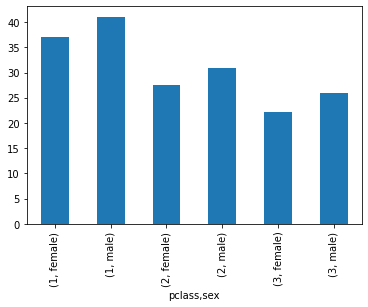

In [82]:
titanic.groupby(['pclass','sex']).age.mean().plot(kind='bar')

In [83]:
titanic.groupby(['pclass','sex']).age.mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


<AxesSubplot:xlabel='pclass'>

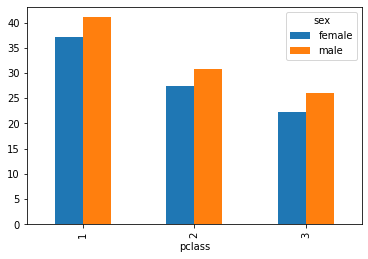

In [84]:
titanic.groupby(['pclass','sex']).age.mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

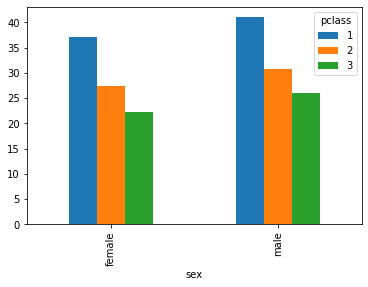

In [86]:
titanic.groupby(['pclass','sex']).age.mean().unstack(level=0).plot(kind='bar')

### grouping By Index

In [89]:
pops.groupby(level=1).sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0


<AxesSubplot:xlabel='year'>

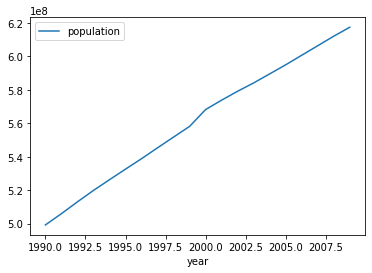

In [90]:
pops.groupby(level=1).sum().head(20).plot()